2.17.0


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 28, 28, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool_1 (MaxPooling2D)                │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 392)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │          12,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,514 (56.70 KB)

 Trainable params: 14,514 (56.70 KB)

 Non-trainable params: 0 (0.00 B)

accuracy: 0.090
Epoch 1/3
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2054 - loss: 2.1346
Epoch 1: saving model to model_checkpoints/checkpoint.weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2074 - loss: 2.1300
Epoch 2/3
298/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4007 - loss: 1.6570
Epoch 2: saving model to model_checkpoints/checkpoint.weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4015 - loss: 1.6544
Epoch 3/3
302/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4532 - loss: 1.5032
Epoch 3: saving model to model_checkpoints/checkpoint.weights.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4535 - loss: 1.5024
accuracy: 0.479


"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


accuracy: 0.093
accuracy: 0.479


D:\Anaconda1\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
"rm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


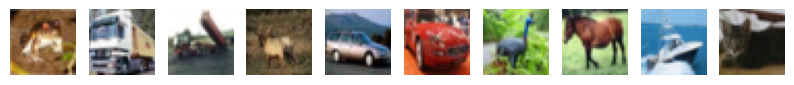

In [8]:
import tensorflow as tf
print(tf.__version__)

# Import the CIFAR-10 dataset and rescale the pixel values

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Use smaller subset -- speeds things up
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

# Plot the first 10 CIFAR-10 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

# Introduce function that creates a new instance of a simple CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def get_new_model():
    model = Sequential([
        Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3), 
               activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create an instance of the model and show model summary

model = get_new_model()
model.summary()

# Test accuracy of the untrained model, around 10% (random)

get_test_accuracy(model, x_test, y_test)

from tensorflow.keras.callbacks import ModelCheckpoint

# Create Tensorflow checkpoint object

checkpoint_path = 'model_checkpoints/checkpoint.weights.h5'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            save_freq = 'epoch',
                            save_weights_only = True,
                            verbose = 1)

# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch

model.fit(x = x_train, y = y_train, 
         epochs = 3,
         callbacks = [checkpoint])

# Have a look at what the checkpoint creates

! ls -lh model_checkpoints
# Evaluate the performance of the trained model

get_test_accuracy(model, x_test, y_test)

# Create a new instance of the (initialised) model, accuracy around 10% again

model = get_new_model()
get_test_accuracy(model, x_test, y_test)

# Load weights -- accuracy is the same as the trained model

model.load_weights(checkpoint_path)
get_test_accuracy(model, x_test, y_test)
! rm -r model_checkpoints

Epoch 1/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2452 - loss: 2.0398 - val_accuracy: 0.4380 - val_loss: 1.5742
Epoch 2/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4444 - loss: 1.5446 - val_accuracy: 0.4710 - val_loss: 1.4508
Epoch 3/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4930 - loss: 1.3963 - val_accuracy: 0.4870 - val_loss: 1.4476


"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.



Epoch 1: val_accuracy improved from -inf to 0.07000, saving model to model_checkpoints_best/checkpoint.weights.h5

Epoch 2: val_accuracy did not improve from 0.07000

Epoch 3: val_accuracy did not improve from 0.07000

Epoch 4: val_accuracy did not improve from 0.07000

Epoch 5: val_accuracy improved from 0.07000 to 0.11000, saving model to model_checkpoints_best/checkpoint.weights.h5

Epoch 6: val_accuracy did not improve from 0.11000

Epoch 7: val_accuracy improved from 0.11000 to 0.14000, saving model to model_checkpoints_best/checkpoint.weights.h5

Epoch 8: val_accuracy did not improve from 0.14000

Epoch 9: val_accuracy did not improve from 0.14000

Epoch 10: val_accuracy improved from 0.14000 to 0.19000, saving model to model_checkpoints_best/checkpoint.weights.h5

Epoch 11: val_accuracy did not improve from 0.19000

Epoch 12: val_accuracy did not improve from 0.19000

Epoch 13: val_accuracy improved from 0.19000 to 0.22000, saving model to model_checkpoints_best/checkpoint.weig

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
D:\Anaconda1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Anaconda1\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


accuracy: 0.280


"rm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


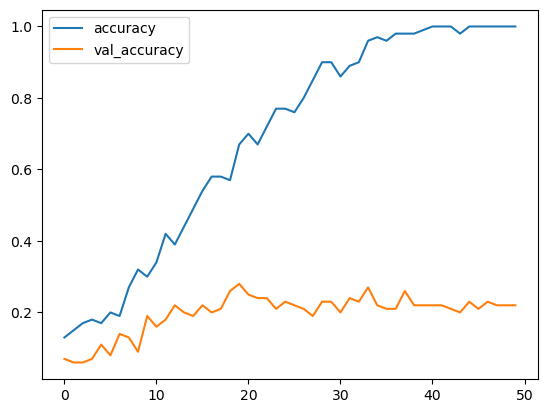

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create Tensorflow checkpoint object with epoch and batch details

checkpoint_5000_path = \
'model_checkpoints_5000/checkpoint_{epoch:02d}_{batch:04d}.weights.h5'
checkpoint_5000 = ModelCheckpoint(filepath = checkpoint_5000_path, 
                                 save_weights_only = True,
                                 save_freq = 5000,
                                verbose = 1)

# Create and fit model with checkpoint

model = get_new_model()
model.fit(x = x_train, y = y_train, 
         epochs = 3,
         validation_data = (x_test, y_test),
         batch_size = 10,
         callbacks = [checkpoint_5000])

# Have a look at what the checkpoint creates

!ls -lh model_checkpoints_5000

# Use tiny training and test set -- will overfit!

x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]

# Create a new instance of untrained model

model = get_new_model()

# Create Tensorflow checkpoint object which monitors the validation accuracy

checkpoint_best_path = 'model_checkpoints_best/checkpoint.weights.h5'
checkpoint_best = ModelCheckpoint(filepath = checkpoint_best_path,
                                 save_weights_only = True,
                                 save_freq = 'epoch',
                                 monitor = 'val_accuracy',
                                 save_best_only = True,
                                 verbose = 1)

# Fit the model and save only the weights with the highest validation accuracy

history = model.fit(x = x_train, y = y_train, 
         epochs = 50,
         validation_data = (x_test, y_test),
         batch_size = 10,
         callbacks = [checkpoint_best],
         verbose = 0)

# Plot training and testing curves

import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

# Inspect the checkpoint directory

!ls -lh model_checkpoints_best

# Create a new model with the saved weights

new_model = get_new_model()
new_model.load_weights(checkpoint_best_path)
get_test_accuracy(new_model, x_test, y_test)
! rm -r model_checkpoints_5000 model_checkpoints_best

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Create Tensorflow checkpoint object

checkpoint_path = 'model_checkpoints.keras'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                                 save_weights_only = False,
                                 save_freq = 'epoch',
                                 monitor = 'val_accuracy',
                                 verbose = 1)

# Create and fit model with checkpoint

model = get_new_model()
model.fit(x = x_train, y = y_train, 
         epochs = 3,
         callbacks = [checkpoint])

# Have a look at what the checkpoint creates

!ls -lh model_checkpoints

# Enter variables directory

!ls -lh model_checkpoints/variables

# Get the model's test accuracy

get_test_accuracy(model, x_test, y_test)
# Delete model

model = 0

from tensorflow.keras.models import load_model
# Reload model from scratch

model = load_model(checkpoint_path)
get_test_accuracy(model, x_test, y_test)
# Save the model in .h5 format

model.save('my_model.h5')
# Inspect .h5 file

!ls -lh my_model.h5
# Delete model

model = 0
# Reload model from scratch

model = load_model('my_model.h5')
get_test_accuracy(model, x_test, y_test)
! rm -r model_checkpoints
! rm my_model.h5

Epoch 1/3


D:\Anaconda1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0938 - loss: 2.3783
Epoch 1: saving model to model_checkpoints.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1360 - loss: 2.3426
Epoch 2/3
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1875 - loss: 2.2343
Epoch 2: saving model to model_checkpoints.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1569 - loss: 2.2578
Epoch 3/3
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1875 - loss: 2.2218
Epoch 3: saving model to model_checkpoints.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1663 - loss: 2.2406


"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


accuracy: 0.100


accuracy: 0.100


"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


accuracy: 0.100


"rm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"rm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [76]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')
# Build Keras ResNet50 model
#from tensorflow.keras.models import load_model
#model = load_model('models/Keras_ResNet50.h5')
model.summary()
# Import 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

#lemon_img = load_img('data/lemon.jpg', target_size=(224, 224))
#viaduct_img = load_img('data/viaduct.jpg', target_size=(224, 224))
#water_tower_img = load_img('data/water_tower.jpg', target_size=(224, 224))
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds
#lemon_img
# Display top 5 predictions

#get_top_5_predictions(lemon_img)

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_14[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [72]:
import tensorflow_hub as hub
from tensorflow.keras.models import load_model
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/1"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])

#model = tf.keras.Sequential([
#    hub.KerasLayer("https://kaggle.com/models/google/mobilenet-v1/TensorFlow2/050-160-classification/1")
#])
#model.build([None, 160, 160, 3])  # Batch input shape.

model.summary()
# Import and preprocess 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img("data/lemon.jpg", target_size=(160, 160))
viaduct_img = load_img("data/viaduct.jpg", target_size=(160, 160))
water_tower_img = load_img("data/water_tower.jpg", target_size=(160, 160))

# Read in categories text file

with open('data/imagenet_categories.txt') as txt_file:
    categories = txt_file.read().splitlines()

# Useful function: presents top 5 predictions

import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

#lemon_img
#get_top_5_predictions(lemon_img)

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x0000025829B242F0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)